## Learning how to make a Makefile

Adapted from [swcarpentry/make-novice repository](https://github.com/swcarpentry/make-novice).

### Make’s fundamental concepts are common across build tools.

> [GNU Make](http://www.gnu.org/software/make/) is a free, fast, well-documented, and very popular Make implementation. From now on, we will focus on it, and when we say Make, we mean GNU Make.

### A tutorial named Introduction.

Cells that follow are the result of following this [introduction](http://swcarpentry.github.io/make-novice/01-intro/).

I have adapted the tutorial so that the steps take place in this Jupyter notebook so that the notebook can be transpiled into a Pelican blog post using a [danielfrg/pelican-ipynb Pelican plugin](https://github.com/danielfrg/pelican-ipynb).

 *Some Jupyter notebook housekeeping to set up some variables with path references.*

In [168]:
import os

In [169]:
(
    TAB_CHAR,
) = (
    '\t',
)

In [170]:
home = os.path.expanduser('~')

*`repo_path` is the path to a clone of [swcarpentry/make-novice](https://github.com/swcarpentry/make-novice)*

In [171]:
repo_path = os.path.join(
    home, 
    'Dropbox/spikes/make-novice',
)

In [172]:
assert os.path.exists(repo_path)

*`paths` are the paths to child directories in a clone of [swcarpentry/make-novice](https://github.com/swcarpentry/make-novice)*

In [173]:
paths = (
    'code',
    'data',
)
paths = (
    code,
    data,
) = [os.path.join(repo_path, path) for path in paths]
assert all(os.path.exists(path) for path in paths)

#### Begin tutorial.

*Use the magic `run` to execute the Python script `wordcount.py`.*

*The variables with '$' in front of them are the values of the Python variables in this
notebook.*

In [174]:
run $code/wordcount.py $data/books/isles.txt $repo_path/isles.dat

*Use shell to examine the first 5 lines of the output file from running `wordcount.py`*

In [175]:
!head -5 $repo_path/isles.dat

the 3822 6.7371760973
of 2460 4.33632998414
and 1723 3.03719372466
to 1479 2.60708619778
a 1308 2.30565838181


> We can see that the file consists of one row per word. Each row shows the word itself, the number of occurrences of that word, and the number of occurrences as a percentage of the total number of words in the text file.

In [176]:
run $code/wordcount.py $data/books/abyss.txt $repo_path/abyss.dat

In [177]:
!head -5 $repo_path/abyss.dat

the 4044 6.35449402891
and 2807 4.41074795726
of 1907 2.99654305468
a 1594 2.50471401634
to 1515 2.38057825267


> Let’s visualize the results. The script plotcount.py reads in a data file and plots the 10 most frequently occurring words as a text-based bar plot:


In [178]:
run $code/plotcount.py $repo_path/isles.dat ascii

the   ########################################################################
of    ##############################################
and   ################################
to    ############################
a     #########################
in    ###################
is    #################
that  ############
by    ###########
it    ###########


> plotcount.py can also show the plot graphically

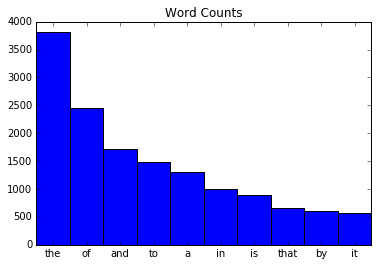

In [179]:
run $code/plotcount.py $repo_path/isles.dat show

> plotcount.py can also create the plot as an image file (e.g. a PNG file)

In [180]:
run $code/plotcount.py $repo_path/isles.dat $repo_path/isles.png

*Import the objects necessary to display the generated png file in this notebook.*

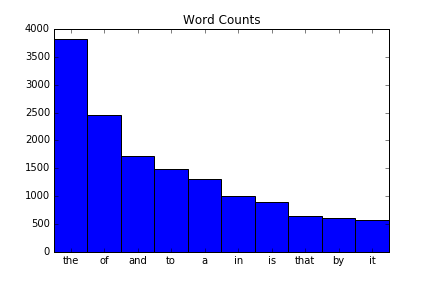

In [181]:
from IPython.display import Image
Image(filename=os.path.join(repo_path, 'isles.png'))

> Finally, let’s test Zipf’s law for these books

> The most frequently-occurring word occurs approximately twice as often as the second most frequent word. This is [Zipf’s Law](http://en.wikipedia.org/wiki/Zipf%27s_law).

In [182]:
run $code/zipf_test.py $repo_path/abyss.dat $repo_path/isles.dat

Book	First	Second	Ratio
/home/dmmmd/Dropbox/spikes/make-novice/abyss	4044	2807	1.44
/home/dmmmd/Dropbox/spikes/make-novice/isles	3822	2460	1.55


 > What we really want is an executable description of our pipeline that allows software to do the tricky part for us: figuring out what steps need to be rerun.

*Create a file, called Makefile, with the following contents.*

*Python's built-in `format` is used to create the contents of the Makefile.*

In [183]:
makefile_contents = """
# Count words.
{repo_path}/isles.dat : {data}/books/isles.txt
{tab_char}python {code}/wordcount.py {data}/books/isles.txt {repo_path}/isles.dat
""".format(code=code, data=data, repo_path=repo_path, tab_char=TAB_CHAR)

*Write the contents to a file named Makefile.*

In [184]:
with open('Makefile', 'w') as fh:
    fh.write(makefile_contents)

> Let’s first sure we start from scratch and delete the .dat and .png files we created earlier:

*Run `rm` in shell.*

In [185]:
!rm $repo_path/*.dat $repo_path/*.png

*Run `make` in shell.*

> By default, Make prints out the actions it executes:

In [186]:
!make

python /home/dmmmd/Dropbox/spikes/make-novice/code/wordcount.py /home/dmmmd/Dropbox/spikes/make-novice/data/books/isles.txt /home/dmmmd/Dropbox/spikes/make-novice/isles.dat


> Let’s see if we got what we expected.

*Run `head` in shell.*

In [188]:
!head -5 $repo_path/isles.dat

the 3822 6.7371760973
of 2460 4.33632998414
and 1723 3.03719372466
to 1479 2.60708619778
a 1308 2.30565838181


A simple Makefile was created. If the dependencies exist, the commands are not run.

> Unlike shell scripts it explicitly records the dependencies between files - what files are needed to create what other files - and so can determine when to recreate our data files or image files, if our text files change. Make can be used for any commands that follow the general pattern of processing files to create new files…

[tutorial continues: Makefiles]({filename}./makefile_tutorial_1.ipynb)